In [1]:
#import libraries
import pandas
import numpy
import pygal
import seaborn as sns

In [2]:
#read in IRIS data file
iris = pandas.read_csv('iris.csv')

In [3]:
#some commands to get familiar with the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
species_count = pandas.value_counts(iris["Species"])
species_count

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
%matplotlib inline
from IPython.display import SVG, HTML

html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [8]:
# show a bar chart of all the sepal lengths
bar_sepal = pygal.Bar()
bar_sepal.title = "Sepal Lengths"
bar_sepal.add("Septal Length", iris["SepalLengthCm"])
HTML(html_pygal.format(pygal_render=bar_sepal.render()))

In [14]:
# Let's compare sepal lengths and widths in a line chart
line_compare = pygal.StackedLine(fille = True)
line_compare.title = "Sepal Lengths and Widths"
line_compare.add("Sepal Length", iris["SepalLengthCm"][0:10])
line_compare.add("Sepal Width", iris["SepalWidthCm"][0:10])
HTML(html_pygal.format(pygal_render=line_compare.render()))

In [17]:
#i love donut charts so here is one for good measure
pie_chart = pygal.Pie(inner_radius=.5)
pie_chart.title = 'Total area by species'
pie_chart.add('Sepal Area', (iris["SepalLengthCm"]*iris["SepalWidthCm"]).sum())
pie_chart.add('Petal Area', (iris["PetalLengthCm"]*iris["PetalWidthCm"]).sum())
HTML(html_pygal.format(pygal_render=pie_chart.render()))

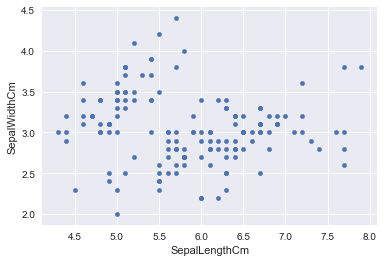

In [18]:
#switch to matplotlib for different types of charts
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

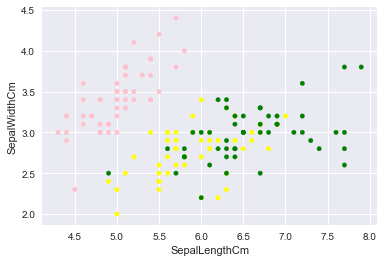

In [19]:
#default colors are teh same, so let's make it even harder by adding in some clashing colors
color_key = {'Iris-setosa':'pink', 'Iris-virginica':'green', 'Iris-versicolor':'yellow'}

iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", c = [color_key[i] for i in iris["Species"]])